# HA 2
## Task 1

### Model A

In [4]:
import numpy as np
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
#Functions for CDF and PDF
#CDF
def CDF(G):
    k = nx.degree(G)
    value_list = k.values()
    pointsCDF = []
    point = 0
    for i in range(1, max(value_list) + 1):
        point = float((point + value_list.count(i)))
        prob = point/len(value_list)
        pointsCDF.append(prob)
    return pointsCDF

#PDF
def PDF(G):
    points = CDF(G)
    pointsPDF = []
    for i in range(0, len(points)-1):
        new_point = points[i+1] - points[i]
        pointsPDF.append(new_point)
    return pointsPDF

In [2]:
#Model A
def GrowWithoutPref(n0, m, t):
    if m > n0:
        print 'Error! m must be greater then n0'
        
    
    G = nx.Graph()
    G.add_nodes_from(range(1, n0+1)) # add n0 nodes
    for i in range(1, t+1):
        G.add_node(n0 + i) # add new node
        availableNodes = range(1, n0 + i)
        count = 1
        while count <= m:
            selected_node = rnd.choice(availableNodes) # choice some node among all nodes exept the one, that just come in 
            G.add_edge(n0 + i, selected_node) # add edge between selected node and new-come node
            availableNodes.remove(selected_node) # remove selected node for not choose it twice
            
            count += 1 # repeat it m times
    return G

In [ ]:
G = GrowWithoutPref(10, 3, 10000)
minK = min(G.degree().values())


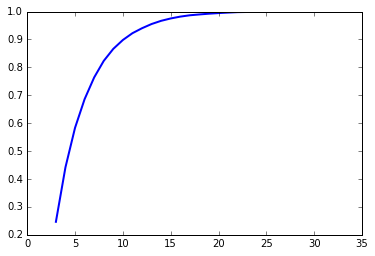

In [7]:
points = CDF(G)
plt.plot(np.arange(minK, len(points)+1), points[minK-1:], linewidth=2, color='blue')

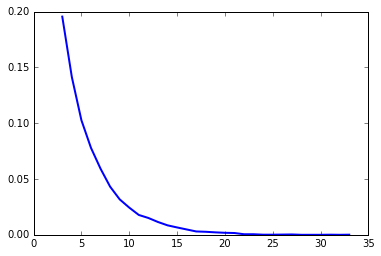

In [9]:
pdf = PDF(G)
plt.plot(np.arange(minK, len(pdf)+1), pdf[minK-1:], linewidth=2, color='blue')
# PDF seems to be exponential

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


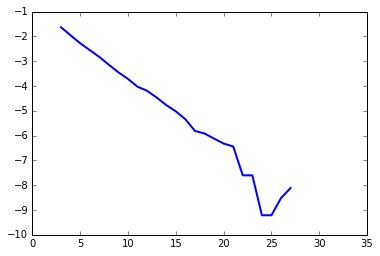

In [10]:
# To check it plot it in log scale
pdf = PDF(G)
plt.plot(np.arange(minK, len(pdf)+1), np.log(pdf[minK-1:]), linewidth=2, color='blue')

In [13]:
#Average Path Leght
def pathLenGrowWithoutPref(n0, m, t):
    if m > n0:
        print 'Error! m must be greater then n0'
        
    pathlen = []
    G = nx.Graph()
    G.add_nodes_from(range(1, n0+1))
    for i in range(1, t+1):
        G.add_node(n0 + i)
        availableNodes = range(1, n0 + i)
        count = 1
        while count <= m:
            selected_node = rnd.choice(availableNodes)
            G.add_edge(n0 + i, selected_node)
            availableNodes.remove(selected_node)
            
            count += 1
        if (i >= 100)&(i%10 == 0) :
            path = nx.average_shortest_path_length(G)
            pathlen.append(path)
            
    return pathlen

In [14]:
pathlen = pathLenGrowWithoutPref(10, 3, 1000)

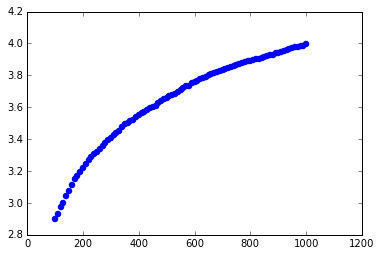

In [25]:
# Plot average path leght
plt.scatter(np.arange(100, 1001, 10), pathlen, linewidth=2, color='blue')


In [28]:
def clustGrowWithoutPref(n0, m, t):
    if m > n0:
        print 'Error! m must be greater then n0'
        
    clustering = []
    G = nx.Graph()
    G.add_nodes_from(range(1, n0+1))
    for i in range(1, t+1):
        G.add_node(n0 + i)
        availableNodes = range(1, n0 + i)
        count = 1
        while count <= m:
            selected_node = rnd.choice(availableNodes)
            G.add_edge(n0 + i, selected_node)
            availableNodes.remove(selected_node)
            
            count += 1
        if (i >= 100)&(i%10 == 0) :
            clust = nx.average_clustering(G)
            clustering.append(clust)
            
    return clustering

In [29]:
av_clust_coef = clustGrowWithoutPref(10, 3, 5000)

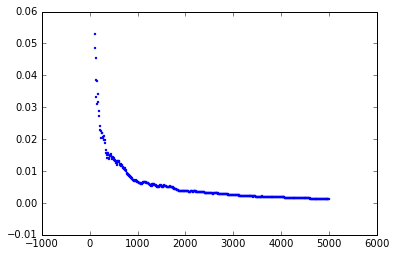

In [32]:
# Plot average clustering coefficient
plt.scatter(np.arange(100, 5001, 10), av_clust_coef, s=2, color='blue')

In [33]:
# Average node degree to the nodes age
def avDegreeGrowWithoutPref(n0, m, t):
    if m > n0:
        print 'Error! m must be greater then n0'
    a = [x for x in range(10, 1000) if x%10 == 0] # Точки за которыми будем следить
    avNodeDegree = []
    for k in a:    # берем точку к и входим в следующий цикл
        kdegree = []
        G = nx.Graph()
        G.add_nodes_from(range(1, n0+1))
    
        for i in range(1, t+1):                                #
            G.add_node(n0 + i)                                 #
            availableNodes = range(1, n0 + i)                  #
            count = 1                                          # добавили к графу точку и соеденили ее
            while count <= m:                                  #
                selected_node = rnd.choice(availableNodes)     #
                G.add_edge(n0 + i, selected_node)              #
                availableNodes.remove(selected_node)           #
                                                               #
                count += 1                                     #
        
            if i >= k:
                nodeDegree = G.degree().values()[k-1]    # После добавления каждой точки считаем степень вершины,  
                kdegree.append(nodeDegree)      # за которой следим, эту степень добавляем в список. Далее считаем среднее
        avdeg = np.mean(kdegree)                # этого списка и полученное число добавляем в итоговый список avNodeDegree
        avNodeDegree.append(avdeg)
        
    return avNodeDegree # таким образом отслеживаем эволюцию степени вершины к с ростом графа и считаем среднюю степень 
                        # вершины за все время роста

In [34]:
avdegree = avDegreeGrowWithoutPref(10, 3, 2000)

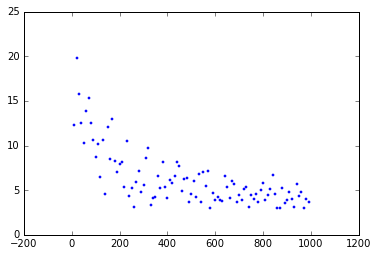

In [36]:
#Plot average node degree depends on node's age
plt.scatter(np.arange(10, 991, 10), avdegree, s=3, color='blue')

### Model B

In [5]:
def WithPrefAttach(n0, m, t):
    if m > n0:
        print 'Error! m must be greater then n0'
        
    G = nx.MultiGraph()  # Пусть G мультиграф, для того чтобы учесть в степени вершин "совпадающие" ребра
    availableNodes = range(1, n0 + 1)
    G.add_nodes_from(availableNodes) # Добавляем n0 точек
    i = 1
    while i < n0: # Соединяем их по цепочке, для того чтобы изначально получить равную вероятность присоединения
        G.add_edge(i, i+1)
        i += 1
    G.add_edge(n0, 1)
    for i in range(1, t+1):
        availableNodes = range(1, n0 + 1) 
        node_degrees = G.degree()
        degrees = node_degrees.values()
        sumOfDegrees = sum(degrees)
        
        selected_node = rnd.randint(1, n0) # Случайно выбираем точку
        availableNodes.remove(selected_node) # Удаляем ее из списка доступных
        count = 1
        while count <= m:
            k = rnd.choice(availableNodes) # Случайно берем одну из доступных точек
            if float(node_degrees[k])/sumOfDegrees >= rnd.random(): # С вероятностью, соот. этой точке, проводим ребро в нее
                G.add_edge(selected_node, k)                        # из выбранной
                availableNodes.remove(k)   # Убираем k из рассмотрения, чтобы опять не провести в нее ребро
                node_degrees = G.degree()        #
                degrees = node_degrees.values()  # Обновляем степени вершин
                sumOfDegrees = sum(degrees)      #
                
                count += 1

                
    return G

In [6]:
G = WithPrefAttach(10, 2, 1000)
minK = min(G.degree().values())

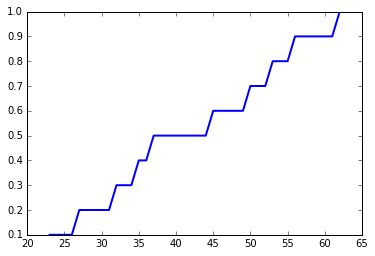

In [139]:
points = CDF(G)
plt.plot(np.arange(minK, len(points)+1), points[minK-1:], linewidth=2, color='blue')

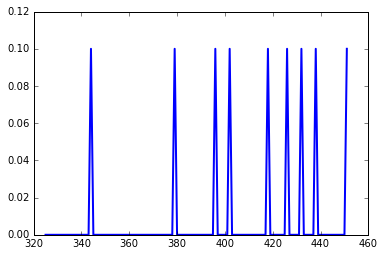

In [7]:
pdf = PDF(G)
plt.plot(np.arange(minK, len(pdf)+1), pdf[minK-1:], linewidth=2, color='blue')